In [1]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11741074335116722829
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2924648859
locality {
  bus_id: 1
  links {
  }
}
incarnation: 152684385829440520
physical_device_desc: "device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
xla_global_id: 416903419
]


In [2]:
import tensorflow as tf


IMG_WIDTH = 512
IMG_HEIGHT = 512
IMG_CHANNELS = 3

BATCH_SIZE = 4



inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)  #  B & W

# outputs = tf.keras.layers.Conv2D(3, (1, 1), padding="same", activation = "softmax")(c9)  # colored segmentation 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 512, 512, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 16  448         ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


# rename dataset images

In [4]:
PATH = 'flower102_dataset/'


In [5]:
# NUMBER_OF_IMAGE = 8199


# for i in range(1 , NUMBER_OF_IMAGE+1):
  j = '%05d' % i
  im_tmp = cv2.imread(PATH+'images/image_'+str(j)+'.jpg')
  seg_tmp = cv2.imread(PATH+'segmim/segmim_'+str(j)+'.jpg')

  # im_tmp = tf.keras.layers.Resizing(IMG_WIDTH, IMG_HEIGHT)(im_tmp).numpy()
  # seg_tmp = tf.keras.layers.Resizing(IMG_WIDTH, IMG_HEIGHT)(seg_tmp).numpy()
  # seg_tmp = cv2.cvtColor(seg_tmp, cv2.COLOR_BGR2GRAY)
  # ret, seg_tmp = cv2.threshold(seg_tmp,50,255,cv2.THRESH_BINARY)
  # seg_tmp = seg_tmp.astype(bool)

  
  cv2.imwrite(PATH+'images1/render/'+str(i)+'.jpg', im_tmp)
  cv2.imwrite(PATH+'segmim1/masks/'+str(i)+'.jpg', seg_tmp)


IndentationError: unexpected indent (3113380452.py, line 5)

In [6]:
# PATH = 'drive/MyDrive/flower102_dataset/'

sasa = cv2.imread(PATH+'segmim1/masks/141.jpg')


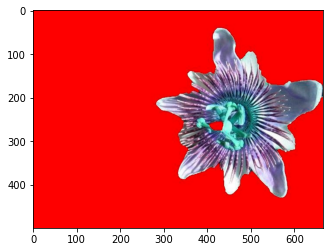

In [7]:
plt.imshow(sasa)

In [8]:
import glob

X_names = glob.glob(PATH+'images1/render/*.jpg')
Y_names = glob.glob(PATH+'segmim1/masks/*.jpg')

X_names.sort()
Y_names.sort()

In [9]:
len(Y_names)

8189

In [10]:
len(X_names)

8189

In [11]:
from sklearn.model_selection import train_test_split
X_train_names, X_val_names, y_train_names, y_val_names = train_test_split(X_names, Y_names, test_size=0.05 , random_state=80)

In [12]:
len(X_train_names) , len(X_val_names) , len(y_train_names) , len(y_val_names)

(7779, 410, 7779, 410)

In [27]:
def preprocess(image , isMask=False):  # to binary
  im_tmp = tf.keras.layers.Resizing(IMG_WIDTH, IMG_HEIGHT)(image).numpy()
  if isMask:
    im_tmp = cv2.cvtColor(im_tmp, cv2.COLOR_BGR2GRAY)
    ret, im_tmp = cv2.threshold(im_tmp,50,255,cv2.THRESH_BINARY)
    im_tmp = im_tmp.astype(bool)
    
  return im_tmp
 



def load_img(img_list ,isMask = False ):
    images=[]
    for i, image_name in enumerate(img_list):    
            
            image = cv2.imread(image_name) 
            image = preprocess(image , isMask)        
            images.append(image)
    images = np.array(images)
    
    return(images)




def imageLoader( img_list, mask_list, batch_size):

    L = len(img_list)

    #keras needs the generator infinite, so we will use while true  
    while True:

        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end, L)
                       
            X = load_img( img_list[batch_start:limit] , False)
            Y = load_img( mask_list[batch_start:limit] , True)

            yield (X,Y) #a tuple with two numpy arrays with batch_size samples     

            batch_start += batch_size   
            batch_end += batch_size


train_img_datagen = imageLoader(X_train_names , y_train_names , BATCH_SIZE)
val_img_datagen = imageLoader(X_val_names , y_val_names , BATCH_SIZE)

In [28]:
img, msk = train_img_datagen.__next__()

msk.shape

(4, 512, 512)

In [29]:
img.shape

(4, 512, 512, 3)

In [30]:
steps_per_epoch = len(X_train_names)//BATCH_SIZE
val_steps_per_epoch = len(X_val_names)//BATCH_SIZE



callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

history=model.fit(train_img_datagen,
          steps_per_epoch=steps_per_epoch,
          epochs=5,
          verbose=1,
          validation_data=val_img_datagen,
          validation_steps=val_steps_per_epoch,
          callbacks=callbacks,
          shuffle=True
          )


model.save('binary_segmentation.h5')  # creates a HDF5 file 'my_model.h5'

Epoch 1/5
1944/1944 [==============================] - 1727s 884ms/step - loss: 0.2123 - accuracy: 0.9115 - val_loss: 0.1946 - val_accuracy: 0.9194
Epoch 2/5
1944/1944 [==============================] - 1069s 550ms/step - loss: 0.1825 - accuracy: 0.9250 - val_loss: 0.1794 - val_accuracy: 0.9257
Epoch 3/5
1944/1944 [==============================] - 860s 442ms/step - loss: 0.1758 - accuracy: 0.9281 - val_loss: 0.1691 - val_accuracy: 0.9295
Epoch 4/5
1944/1944 [==============================] - 864s 445ms/step - loss: 0.1718 - accuracy: 0.9300 - val_loss: 0.1641 - val_accuracy: 0.9325
Epoch 5/5
1944/1944 [==============================] - 876s 451ms/step - loss: 0.1690 - accuracy: 0.9312 - val_loss: 0.1628 - val_accuracy: 0.9332


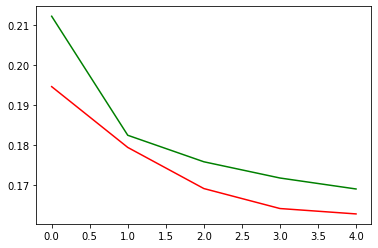

In [31]:
plt.plot(history.history['loss'] , color = 'green')
plt.plot(history.history['val_loss'] , color = 'red')

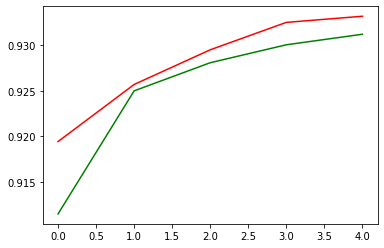

In [32]:
plt.plot(history.history['accuracy'] , color = 'green')
plt.plot(history.history['val_accuracy'] , color = 'red')

In [13]:
from keras.models import load_model

model2 = load_model('binary_segmentation.h5')

In [14]:
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda_1 (Lambda)              (None, 512, 512, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 512, 512, 16  448         ['lambda_1[0][0]']               
                                )                                                                 
                                                                                            

In [40]:
import random

X_val_names , y_val_names

rands = random.sample(range(len(X_val_names)), 10)

rands


[393, 360, 239, 226, 409, 81, 392, 243, 325, 88]

In [41]:
X_val_names[rands[1]]

'flower102_dataset/images1/render\\6253.jpg'

In [42]:
input_images = []
mask_images = []

for i in rands:
    itmp = cv2.imread(X_val_names[i])
    otmp = cv2.imread(y_val_names[i])
    input_images.append(tf.keras.layers.Resizing(IMG_WIDTH, IMG_HEIGHT)(itmp).numpy())
    mask_images.append(tf.keras.layers.Resizing(IMG_WIDTH, IMG_HEIGHT)(otmp).numpy())

input_images = np.array(input_images)
mask_images = np.array(mask_images)

generated_masks = model2.predict(input_images)

generated_masks.shape

(10, 512, 512, 1)

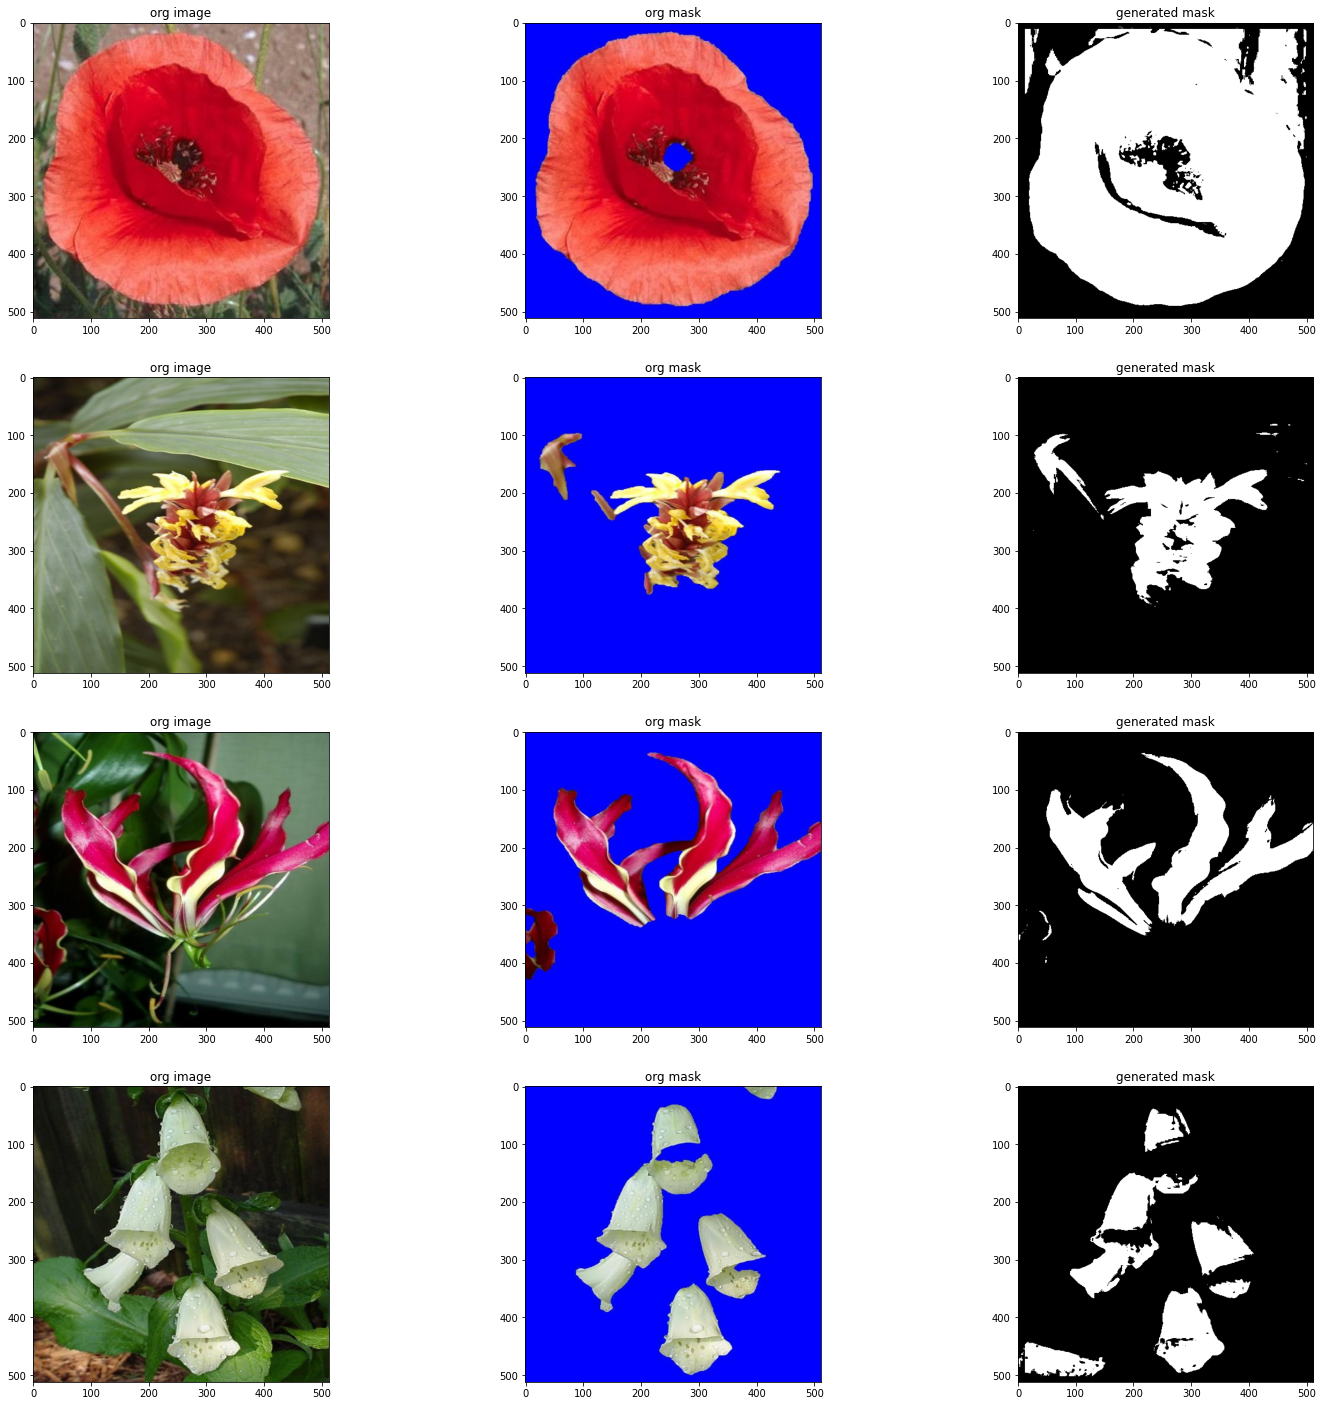

In [43]:

fig, subplt = plt.subplots(4,3,figsize=(25,25))
for i in range(4):
    im = cv2.cvtColor(input_images[i]/255.0, cv2.COLOR_BGR2RGB)
    subplt[i][0].imshow(im)
    subplt[i][0].set_title("org image")

    im = cv2.cvtColor(mask_images[i]/255.0, cv2.COLOR_BGR2RGB)
    subplt[i][1].imshow(im)
    subplt[i][1].set_title("org mask")

    ret, im_tmp = cv2.threshold(generated_masks[i],0.5,1,cv2.THRESH_BINARY)
    subplt[i][2].imshow(im_tmp,cmap = 'gray')
    subplt[i][2].set_title("generated mask")

    



plt.show()
fig.savefig('0_3.png')

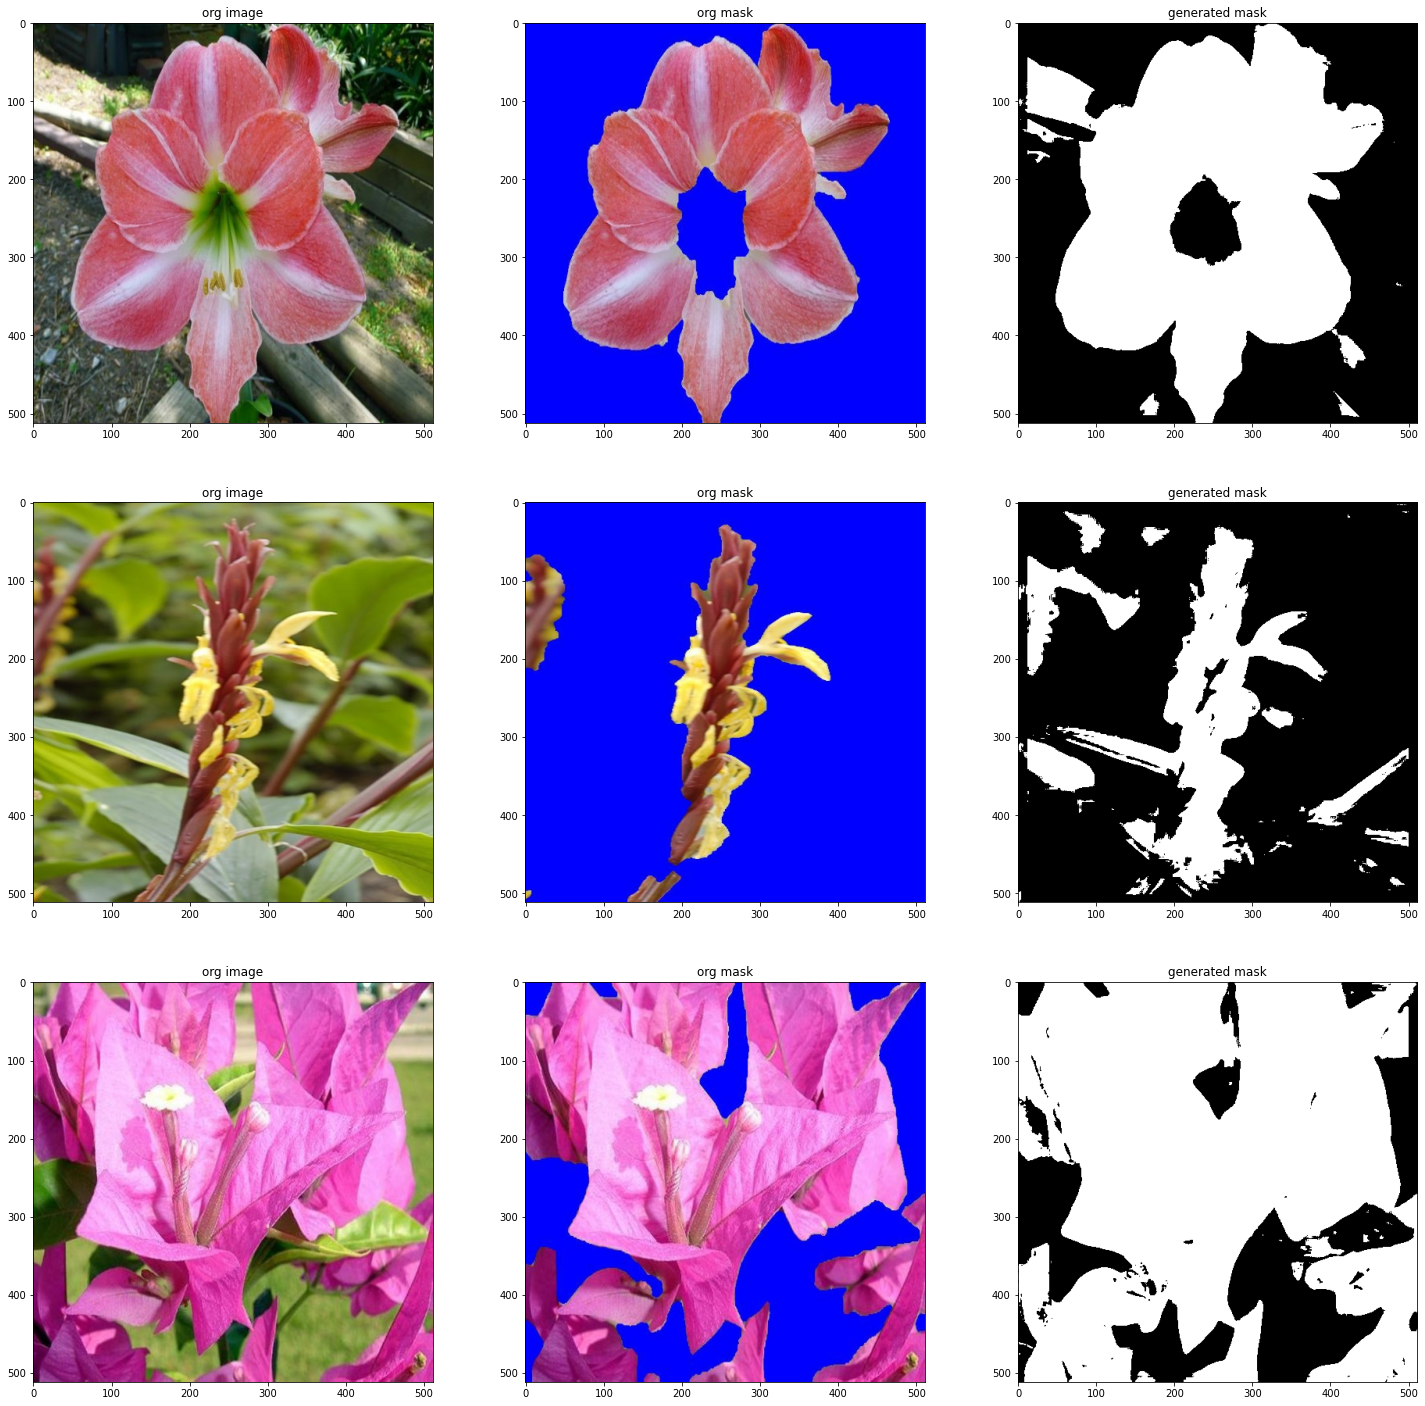

In [44]:
fig, subplt = plt.subplots(3,3,figsize=(25,25))
for i in range(4 ,7):
    im = cv2.cvtColor(input_images[i]/255.0, cv2.COLOR_BGR2RGB)
    subplt[i-4][0].imshow(im)
    subplt[i-4][0].set_title("org image")

    im = cv2.cvtColor(mask_images[i]/255.0, cv2.COLOR_BGR2RGB)
    subplt[i-4][1].imshow(im)
    subplt[i-4][1].set_title("org mask")

    ret, im_tmp = cv2.threshold(generated_masks[i],0.5,1,cv2.THRESH_BINARY)
    subplt[i-4][2].imshow(im_tmp,cmap = 'gray')
    subplt[i-4][2].set_title("generated mask")

    



plt.show()
fig.savefig('4_6.png')

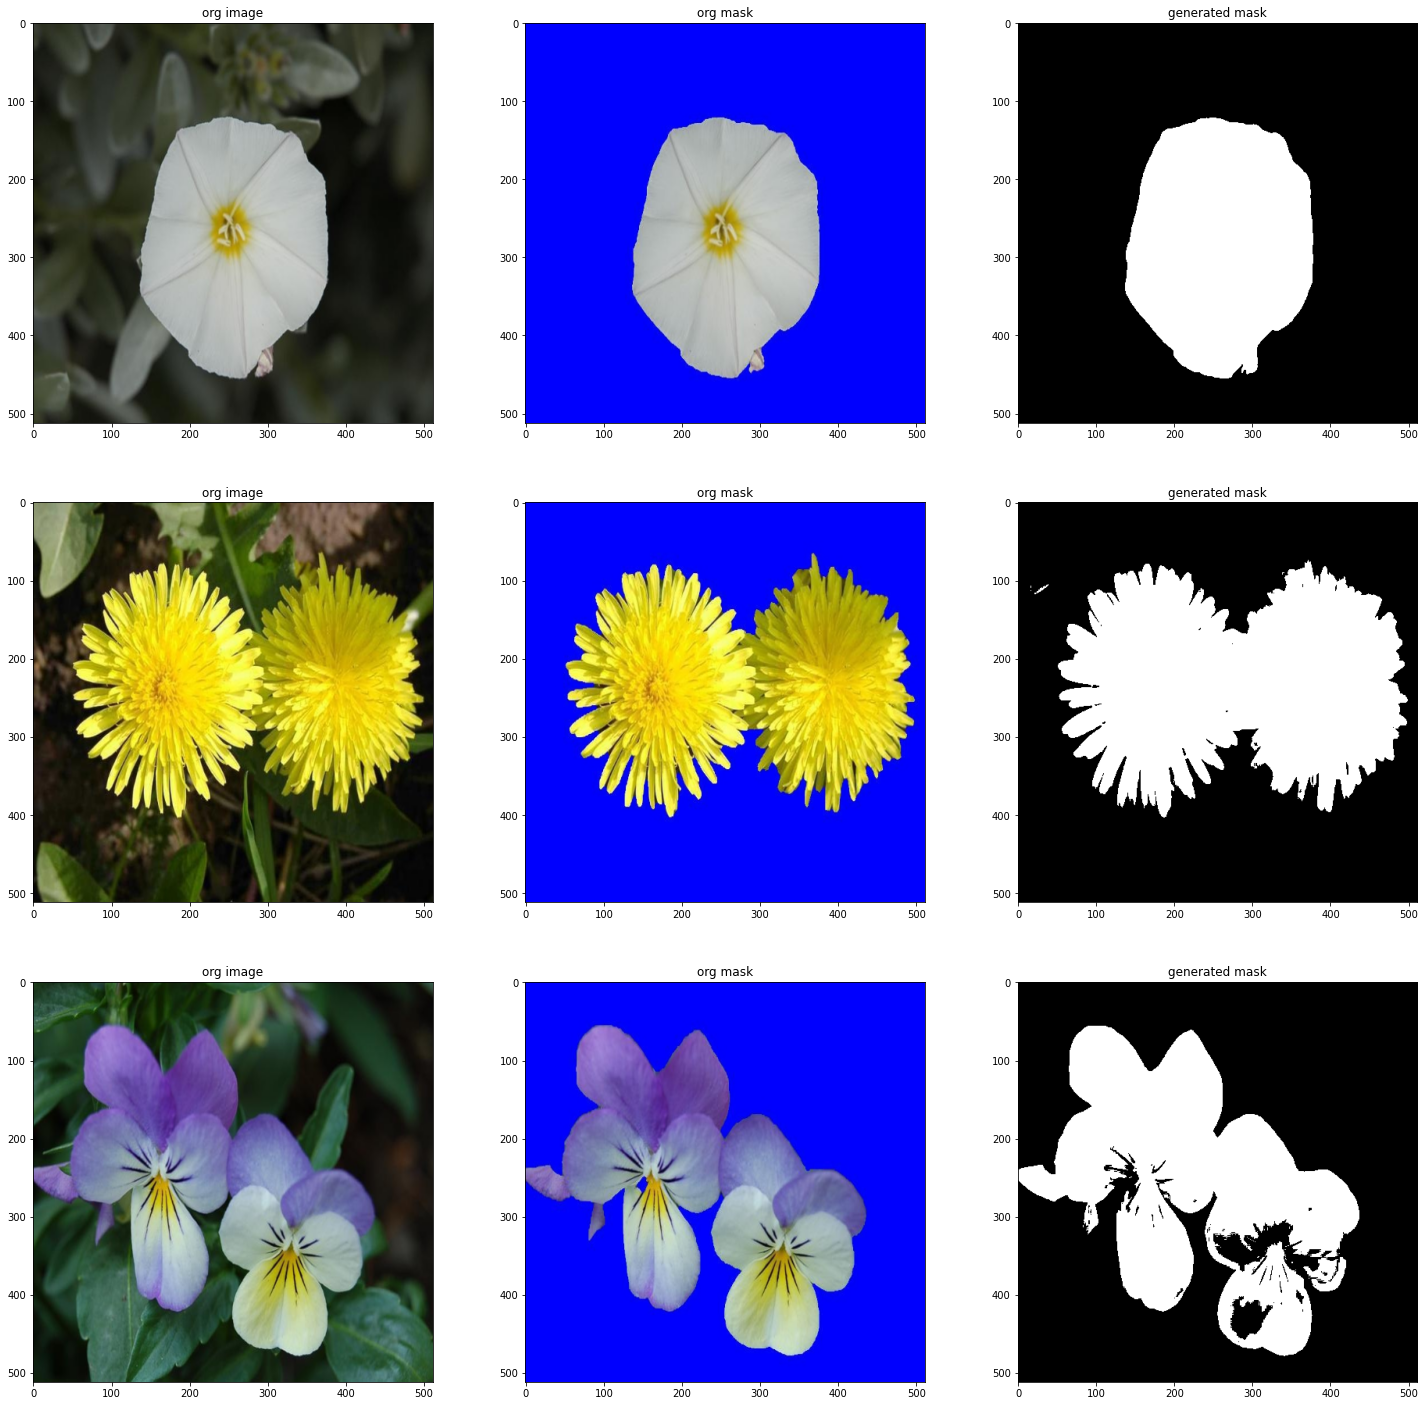

In [45]:
fig, subplt = plt.subplots(3,3,figsize=(25,25))
for i in range(7,10):
    im = cv2.cvtColor(input_images[i]/255.0, cv2.COLOR_BGR2RGB)
    subplt[i-7][0].imshow(im)
    subplt[i-7][0].set_title("org image")

    im = cv2.cvtColor(mask_images[i]/255.0, cv2.COLOR_BGR2RGB)
    subplt[i-7][1].imshow(im)
    subplt[i-7][1].set_title("org mask")

    ret, im_tmp = cv2.threshold(generated_masks[i],0.5,1,cv2.THRESH_BINARY)
    subplt[i-7][2].imshow(im_tmp,cmap = 'gray')
    subplt[i-7][2].set_title("generated mask")

    



plt.show()
fig.savefig('7_9.png')